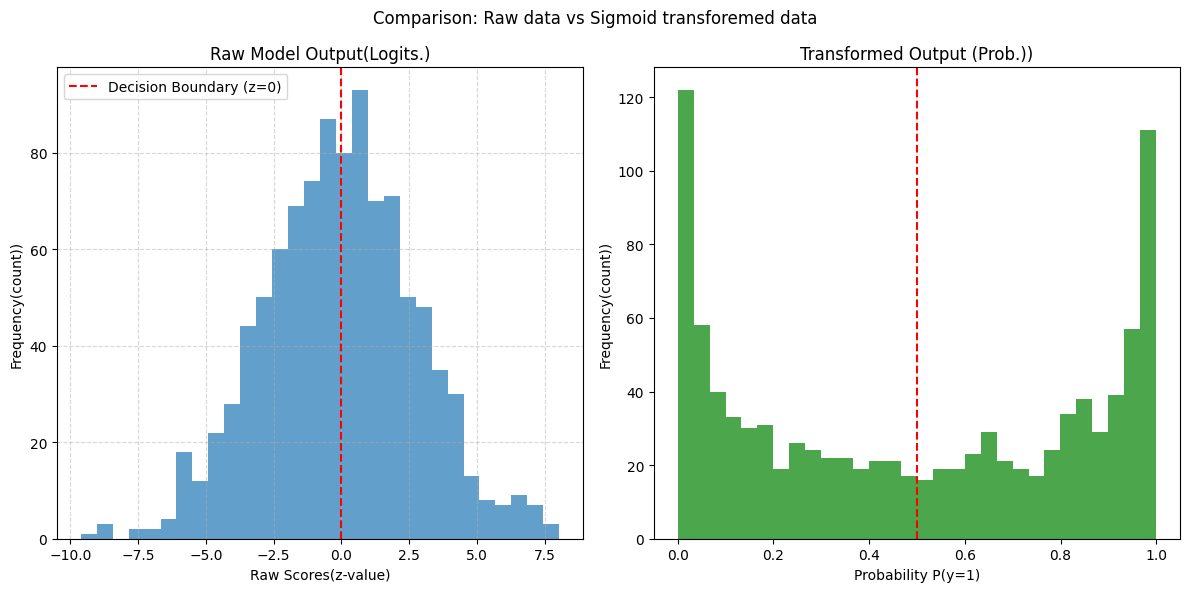

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))
sigmoid(5)

#模擬數據
np.random.seed(10)
raw_scores = np.random.normal(loc=0, scale=3.0, size=1000)
#轉換數據
probabilities = sigmoid(raw_scores)
#視覺化
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.hist(raw_scores, bins=30, alpha=0.7)
ax1.set_title("Raw Model Output(Logits.)")
ax1.set_xlabel("Raw Scores(z-value)")
ax1.set_ylabel("Frequency(count))")
ax1.axvline(x=0, color = "red", linestyle='--', label="Decision Boundary (z=0)")
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5 )


ax2.hist(probabilities, bins=30, color="green", alpha=0.7)
ax2.set_title("Transformed Output (Prob.))")
ax2.set_xlabel("Probability P(y=1)")
ax2.set_ylabel("Frequency(count))")
ax2.axvline(x=0.5, color = "red", linestyle='--', label="Probability Threshold (p=0.5)")

fig.suptitle("Comparison: Raw data vs Sigmoid transforemed data")
plt.tight_layout()
plt.show()




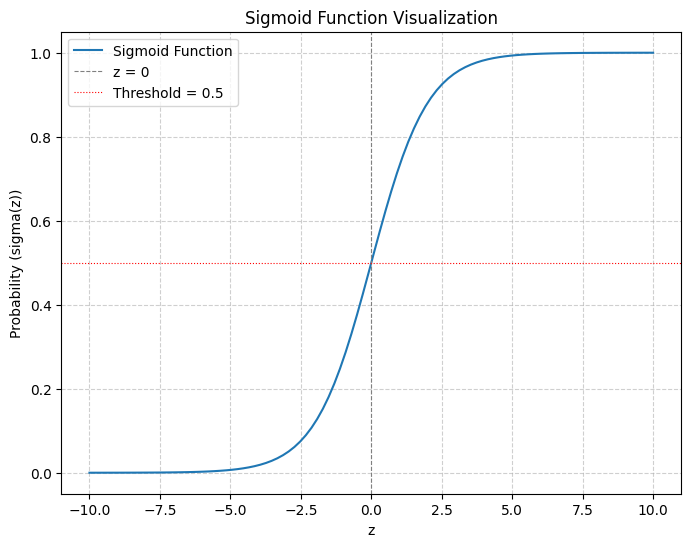

In [137]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):
# Sigmoid 函數的實作
    return 1 / (1 + np.exp(-z))

# 生成一系列從 -10 到 10 的數值
z = np.linspace(-10, 10, 100)
# 計算對應的 Sigmoid 值
sigma_z = sigmoid(z)

# 繪製 Sigmoid 函數圖形
plt.figure(figsize=(8, 6))
plt.plot(z, sigma_z, label='Sigmoid Function')
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8, label='z = 0') # 繪製 z=0 的垂直線
plt.axhline(0.5, color='red', linestyle=':', linewidth=0.8, label='Threshold = 0.5') # 繪製 y=0.5 的水平線
plt.title('Sigmoid Function Visualization') # 圖表標題
plt.xlabel('z') # x 軸標籤
plt.ylabel('Probability (sigma(z))') # y 軸標籤
plt.grid(True, linestyle='--', alpha=0.6) # 顯示格線
plt.legend() # 顯示圖例
plt.show()


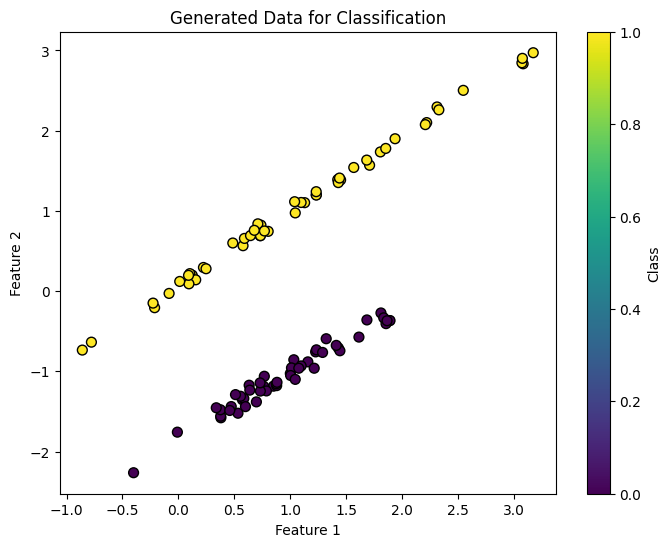

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification #用於生成資料集

X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

#視覺化
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('Generated Data for Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()




In [51]:
# 2.劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
# 3.初始化並訓練邏輯回歸模型
model = LogisticRegression(solver = 'liblinear' , random_state=42, C=1.0)

model.fit(X_train, y_train)
# 4. 在測試集上進行預測
y_pred = model.predict(X_test)
# 預測每個樣本屬於各類別的機率
y_pred_proba = model.predict_proba(X_test)

# 5. 模型評估
print("模型係數: ", model.coef_)
print("模型截距: ", model.intercept_)
accuracy = accuracy_score(y_test, y_pred)
print(f"準確度: {accuracy:.3f}")
print("混淆矩陣 ")
print(confusion_matrix(y_test, y_pred))
print("分類報告")
print(classification_report(y_test, y_pred))

模型係數:  [[-1.16920347  2.86507572]]
模型截距:  [1.10096175]
準確度: 0.967
混淆矩陣 
[[16  0]
 [ 1 13]]
分類報告
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



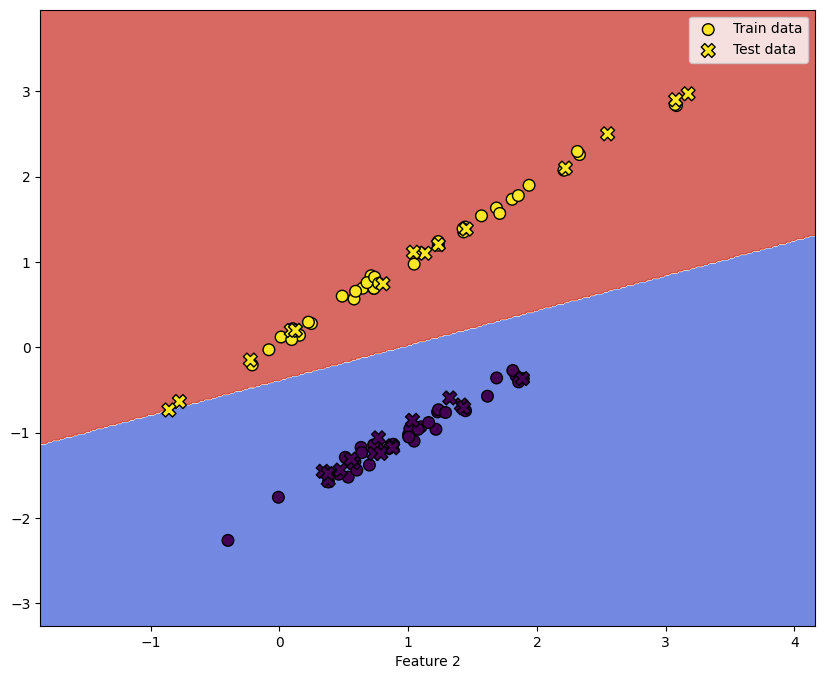

In [52]:
# 6. 可視化決策邊界 (Decision Boundary)
#網格點
x_min , x_max = X[:,0].min() -1 , X[:,0].max() + 1
y_min , y_max = X[:,1].min() -1 , X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min , x_max , 0.02), np.arange(y_min, y_max, 0.02))

#預測網格點的類別
Z = model.predict(np.c_[xx.ravel(), yy.ravel() ]) #ravel()將多維陣列壓平成一維陣列
Z = Z.reshape(xx.shape)

#如果 Z 是 [0,0,1,1] ==> [0,0]
#                        [1,1]

plt.figure(figsize=(10,8))
#繪製決策邊界
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
#繪製訓練集和測試集資料點
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', edgecolors='k', s=70, label='Train data')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='viridis',marker='X', edgecolors='k', s=100, label='Test data')

plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.legend()
plt.show()

準確度:0.933
混淆矩陣 
[[36  0]
 [ 6 48]]
分類報告
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        36
           1       1.00      0.89      0.94        54

    accuracy                           0.93        90
   macro avg       0.93      0.94      0.93        90
weighted avg       0.94      0.93      0.93        90



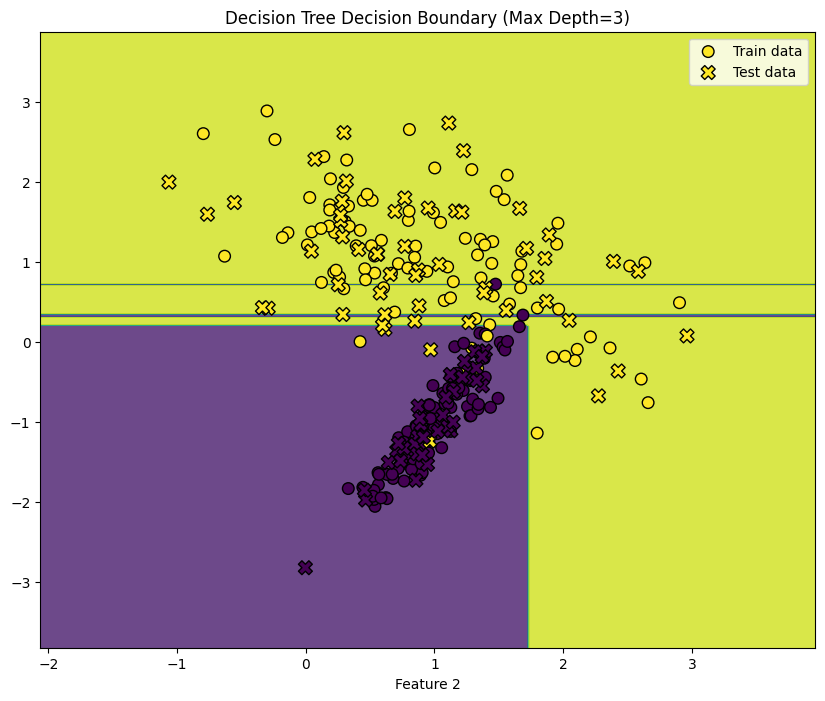

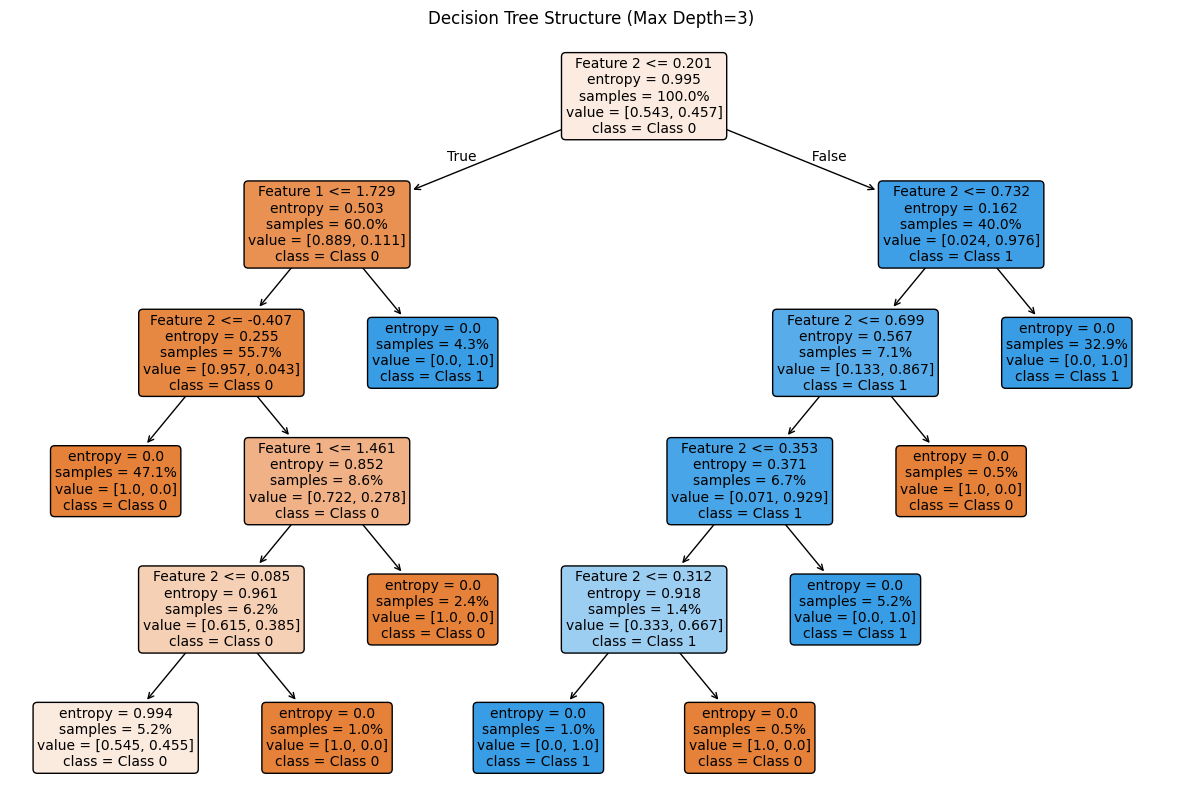

In [88]:
#決策樹
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification #用於生成資料集
from sklearn.tree import DecisionTreeClassifier, plot_tree #引入決策樹分類器和繪圖函式

X,y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 2.劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)
# 3.初始化並訓練決策模型
model = DecisionTreeClassifier(criterion= "entropy" ,max_depth=5 , random_state=42)
model.fit(X_train,y_train)
# 4.在測試集上進行預測
y_pred = model.predict(X_test)
# 5. 模型評估
accuracy =accuracy_score(y_test, y_pred)
print(f"準確度:{accuracy:.3f}")
print("混淆矩陣 ")
print(confusion_matrix(y_test, y_pred))
print("分類報告")
print(classification_report(y_test, y_pred))

# 6. 可視化決策邊界 (Decision Boundary)
#網格點
x_min , x_max = X[:,0].min() -1 , X[:,0].max() + 1
y_min , y_max = X[:,1].min() -1 , X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min , x_max , 0.02), np.arange(y_min, y_max, 0.02))

#預測網格點的類別
Z = model.predict(np.c_[xx.ravel(), yy.ravel() ]) #ravel()將多維陣列壓平成一維陣列
Z = Z.reshape(xx.shape)


#繪製決策邊界
plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, alpha=0.8)
#繪製訓練集和測試集資料點
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', edgecolors='k', s=70, label='Train data')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='viridis',marker='X', edgecolors='k', s=100, label='Test data')


plt.title("Decision Tree Decision Boundary (Max Depth=3)")
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.legend()
plt.show()

#7.可視化決策樹結構
plt.figure(figsize=(15,10))
#繪製決策樹，feature_names 和 class_names 可以讓圖形更具可讀性
plot_tree(model,
          feature_names=["Feature 1", "Feature 2"],#特徵名稱
          class_names=["Class 0","Class 1"],#類別名稱
          filled=True,#是否填充節點顏色
          rounded=True,#是否圓角
          proportion=True,#顯示樣本比例
          fontsize=10)#字體大小
plt.title("Decision Tree Structure (Max Depth=3)")
plt.show()

準確度:0.986
混淆矩陣 
[[114   0]
 [  3  93]]
分類報告
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       114
           1       1.00      0.97      0.98        96

    accuracy                           0.99       210
   macro avg       0.99      0.98      0.99       210
weighted avg       0.99      0.99      0.99       210



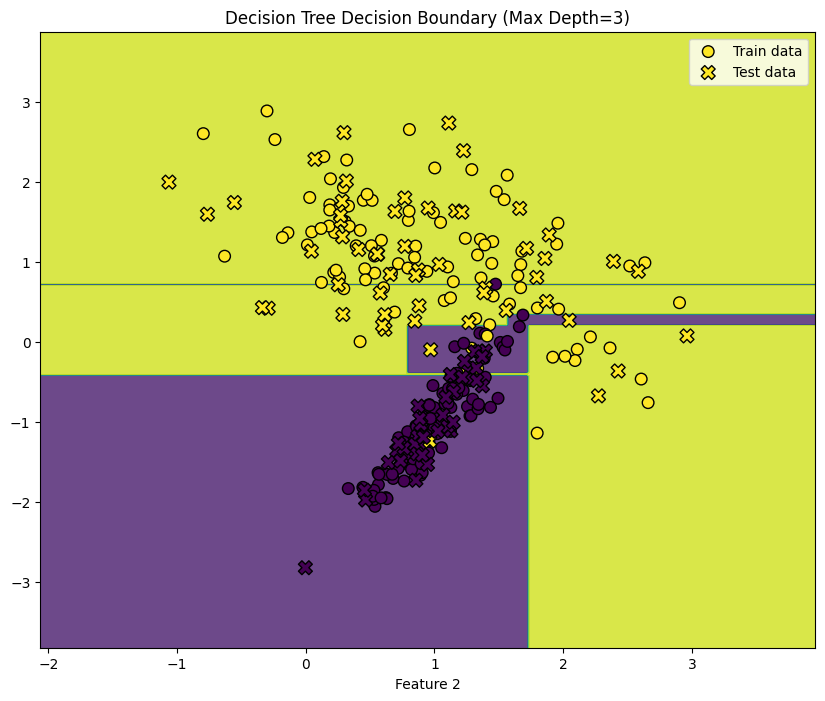

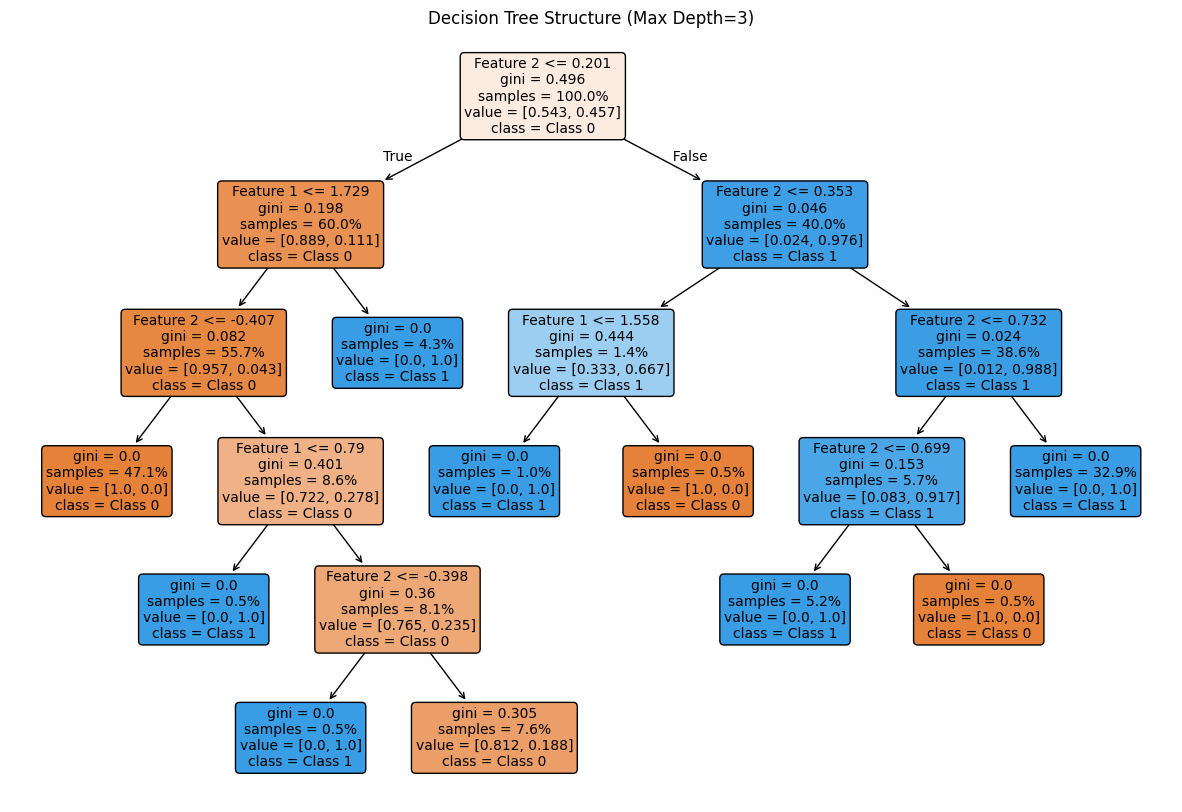

In [90]:
#決策樹
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification #用於生成資料集
from sklearn.tree import DecisionTreeClassifier, plot_tree #引入決策樹分類器和繪圖函式

X,y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 2.劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)
# 3.初始化並訓練決策模型
model_train = DecisionTreeClassifier(criterion= "gini", max_depth=5 , random_state=42)
model_train.fit(X_train,y_train)
# 4.在測試集上進行預測
y_train_pred = model_train.predict(X_train)
# 5. 模型評估
accuracy =accuracy_score(y_train, y_train_pred)
print(f"準確度:{accuracy:.3f}")
print("混淆矩陣 ")
print(confusion_matrix(y_train, y_train_pred))
print("分類報告")
print(classification_report(y_train, y_train_pred))



# 6. 可視化決策邊界 (Decision Boundary)
#網格點
x_min , x_max = X[:,0].min() -1 , X[:,0].max() + 1
y_min , y_max = X[:,1].min() -1 , X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min , x_max , 0.02), np.arange(y_min, y_max, 0.02))

#預測網格點的類別
Z = model_train.predict(np.c_[xx.ravel(), yy.ravel() ]) #ravel()將多維陣列壓平成一維陣列
Z = Z.reshape(xx.shape)


#繪製決策邊界
plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, alpha=0.8)
#繪製訓練集和測試集資料點
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', edgecolors='k', s=70, label='Train data')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='viridis',marker='X', edgecolors='k', s=100, label='Test data')


plt.title("Decision Tree Decision Boundary (Max Depth=3)")
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.legend()
plt.show()

#7.可視化決策樹結構
plt.figure(figsize=(15,10))
#繪製決策樹，feature_names 和 class_names 可以讓圖形更具可讀性
plot_tree(model_train,
          feature_names=["Feature 1", "Feature 2"],#特徵名稱
          class_names=["Class 0","Class 1"],#類別名稱
          filled=True,#是否填充節點顏色
          rounded=True,#是否圓角
          proportion=True,#顯示樣本比例
          fontsize=10)#字體大小
plt.title("Decision Tree Structure (Max Depth=3)")
plt.show()



In [103]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification #用於生成資料集

X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 2.劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)
# 3.初始化並訓練決策模型
model = DecisionTreeClassifier(criterion= "entropy" ,max_depth=5 , random_state=42)
model.fit(X_train,y_train)
# 4.在測試集上進行預測
y_pred = model.predict(X_test)

# 5. 模型評估
accuracy =accuracy_score(y_test, y_pred)
print(f"準確度:{accuracy:.3f}")
print("混淆矩陣 ")
print(confusion_matrix(y_test, y_pred))
print("分類報告")
print(classification_report(y_test, y_pred))


準確度:0.917
混淆矩陣 
[[139   4]
 [ 21 136]]
分類報告
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       143
           1       0.97      0.87      0.92       157

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [104]:
X,y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 2.劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)
# 3.初始化並訓練決策模型
model = LogisticRegression(solver = 'liblinear' , random_state=42, C=1.0)
model.fit(X_train,y_train)
# 4.在測試集上進行預測
y_train_pred = model.predict(X_test)
# 5. 模型評估
accuracy =accuracy_score(y_test, y_train_pred)
print(f"準確度:{accuracy:.3f}")
print("混淆矩陣 ")
print(confusion_matrix(y_test, y_train_pred))
print("分類報告")
print(classification_report(y_test, y_train_pred))

準確度:0.956
混淆矩陣 
[[36  0]
 [ 4 50]]
分類報告
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        36
           1       1.00      0.93      0.96        54

    accuracy                           0.96        90
   macro avg       0.95      0.96      0.95        90
weighted avg       0.96      0.96      0.96        90



未縮放準確度:0.917
未縮放混淆矩陣 
[[141   6]
 [ 19 134]]
未縮放分類報告
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       147
           1       0.96      0.88      0.91       153

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

縮放準確度:0.930
縮放混淆矩陣 
[[140   7]
 [ 14 139]]
縮放分類報告
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       147
           1       0.95      0.91      0.93       153

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



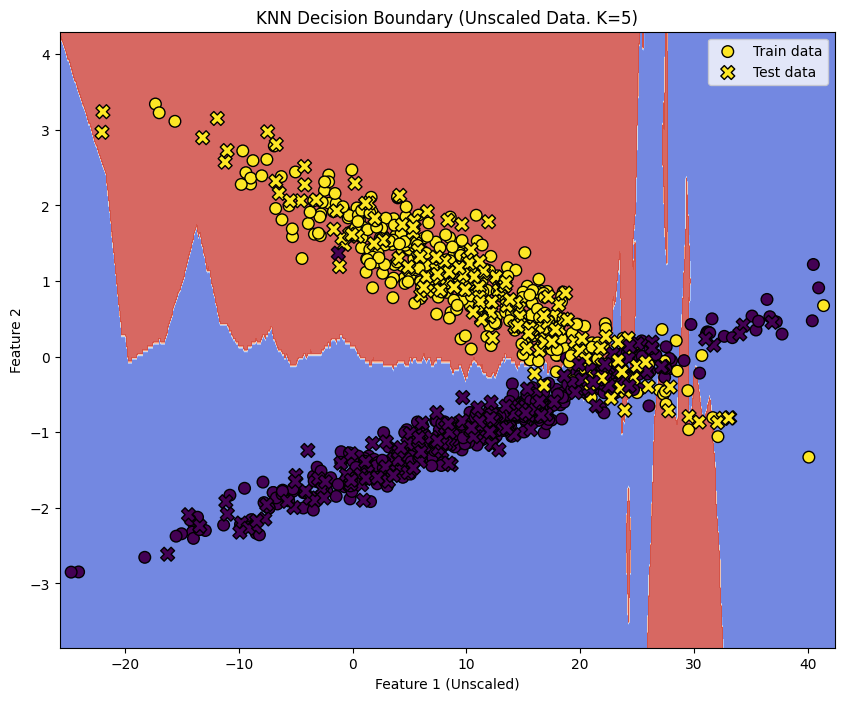

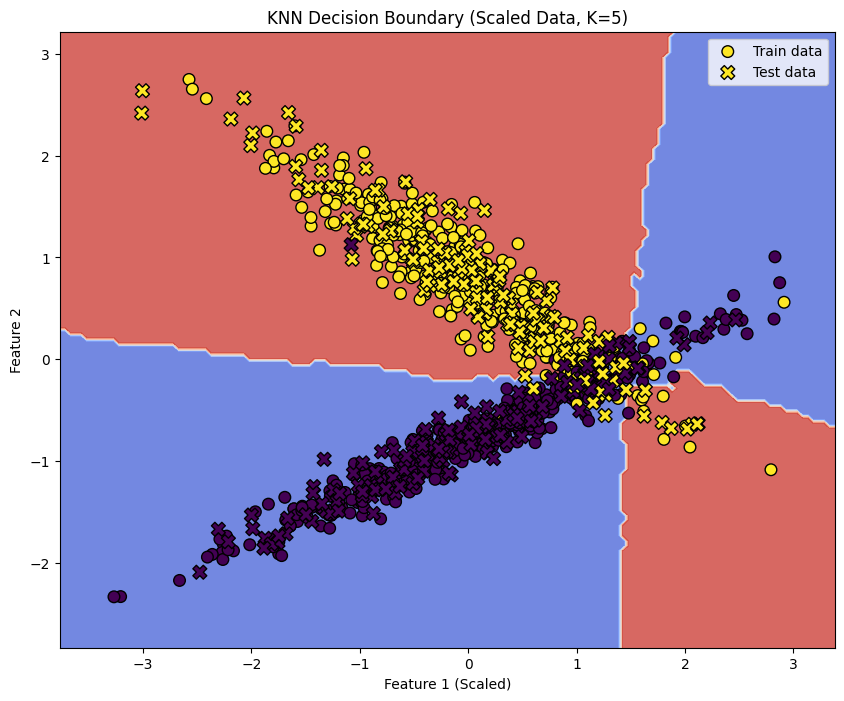

In [136]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #引入 K-近鄰分類器
from sklearn.preprocessing import StandardScaler #引入標準化工具
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification 
n_Neighbors = 5




X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

#特徵縮放
X_unscaled = X.copy()
X_unscaled[:,0] = X_unscaled[:,0] * 10

# 2.劃分訓練集和測試集(針對未縮放的資料)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X_unscaled, y, test_size=0.3, random_state=42)
# 3.特徵縮放(使用 StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.fit_transform(X_test_unscaled)

# 4. 初始化並訓練 KNN 模型(未縮放資料)

knn_unscaled = KNeighborsClassifier(n_neighbors=n_Neighbors, weights="uniform")
knn_unscaled.fit(X_train_unscaled, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test_unscaled)


# 4.1 模型評估(未縮放)
accuracy_unscaled =accuracy_score(y_test, y_pred_unscaled)
print(f"未縮放準確度:{accuracy_unscaled:.3f}")
print("未縮放混淆矩陣 ")
print(confusion_matrix(y_test, y_pred_unscaled))
print("未縮放分類報告")
print(classification_report(y_test, y_pred_unscaled))

print("="*100)
# 5. 初始化並訓練 KNN 模型(縮放資料)

knn_scaled = KNeighborsClassifier(n_neighbors = n_Neighbors, weights="uniform")
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
# 5.1 模型評估(縮放資料)
accuracy_scaled =accuracy_score(y_test, y_pred_scaled)
print(f"縮放準確度:{accuracy_scaled:.3f}")
print("縮放混淆矩陣 ")
print(confusion_matrix(y_test, y_pred_scaled))
print("縮放分類報告")
print(classification_report(y_test, y_pred_scaled))


# 6. 可視化決策邊界 (未縮放資料)
#網格點
x_min_unscaled , x_max_unscaled = X_unscaled[:,0].min() -1 , X_unscaled[:,0].max() + 1
y_min_unscaled , y_max_unscaled = X_unscaled[:,1].min() -1 , X_unscaled[:,1].max() + 1

xx_unscaled, yy_unscaled = np.meshgrid(np.arange(x_min_unscaled , x_max_unscaled , 0.05), np.arange(y_min_unscaled, y_max_unscaled, 0.05))

#預測網格點的類別
Z_unscaled = knn_unscaled.predict(np.c_[xx_unscaled.ravel(), yy_unscaled.ravel() ]) #ravel()將多維陣列壓平成一維陣列
Z_unscaled = Z_unscaled.reshape(xx_unscaled.shape)


#繪製決策邊界
plt.figure(figsize=(10,8))
plt.contourf(xx_unscaled, yy_unscaled, Z_unscaled, alpha=0.8, cmap = "coolwarm")
plt.scatter(X_train_unscaled[:,0], X_train_unscaled[:,1], c=y_train, cmap='viridis', edgecolors='k', s=70, label='Train data')
plt.scatter(X_test_unscaled[:,0], X_test_unscaled[:,1], c=y_test, cmap='viridis',marker='X', edgecolors='k', s=100, label='Test data')


plt.title("KNN Decision Boundary (Unscaled Data. K=5)")
plt.xlabel("Feature 1 (Unscaled)")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

#7.可視化決策邊界(縮放資料)
xx_scaled, yy_scaled = np.meshgrid(np.arange(X_train_scaled[:,0].min()-0.5 , X_train_scaled[:,0].max() + 0.5, 0.05),
                                             np.arange(X_train_scaled[:,1].min()-0.5 , X_train_scaled[:,1].max() + 0.5, 0.05))
#預測網格點的類別(注意這裡也需要縮放網格點)
Z_scaled = knn_scaled.predict(np.c_[xx_scaled.ravel(), yy_scaled.ravel() ]) #ravel()將多維陣列壓平成一維陣列
Z_scaled = Z_scaled.reshape(xx_scaled.shape)
#繪製決策邊界
plt.figure(figsize=(10,8))
plt.contourf(xx_scaled, yy_scaled, Z_scaled, alpha=0.8, cmap = "coolwarm")
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, cmap='viridis', edgecolors='k', s=70, label='Train data')
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=y_test, cmap='viridis',marker='X', edgecolors='k', s=100, label='Test data')

plt.title("KNN Decision Boundary (Scaled Data, K=5)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



原始資料中類別 0 的數量: 180, 類別 1 的數量: 20
訓練集中類別 0 的數量: 126, 類別 1 的數量: 14
測試集中類別 0 的數量: 54, 類別 1 的數量: 6
------------------------------
混淆矩陣 (Confusion Matrix):
[[54  0]
 [ 2  4]]
  TP: 4, FN: 2
  FP: 0, TN: 54
------------------------------
準確度 (Accuracy): 0.9667
精確度 (Precision): 1.0000
召回率 (Recall): 0.6667
F1 分數 (F1-Score): 0.8000

分類報告 (Classification Report):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.67      0.80         6

    accuracy                           0.97        60
   macro avg       0.98      0.83      0.89        60
weighted avg       0.97      0.97      0.96        60

------------------------------


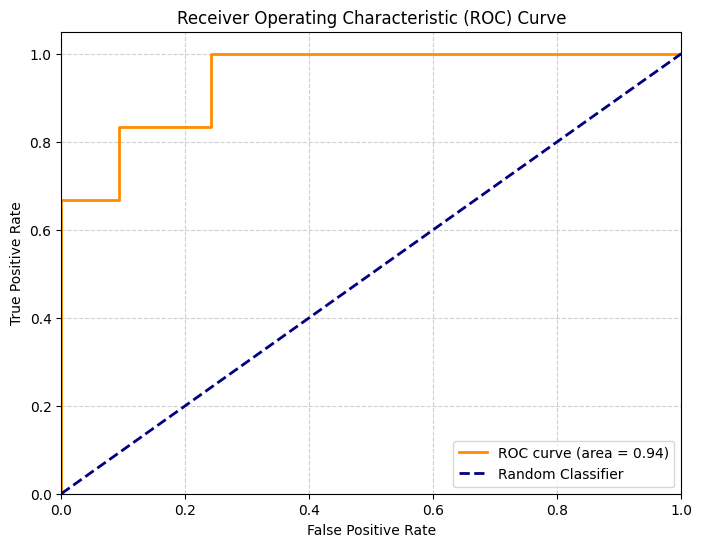

AUC (Area Under the Curve): 0.9444


In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # 重新使用邏輯迴歸模型
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
                            confusion_matrix, classification_report, roc_curve, auc
from sklearn.datasets import make_classification

# 1. 生成合成資料集 (稍微調整，增加一點點不平衡性來觀察效果)
# weights=[0.9, 0.1] 表示類別 0 佔 90%，類別 1 佔 10%
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.9, 0.1], random_state=42)

# 2. 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y 確保訓練集和測試集中的類別分佈與原始資料集保持一致

print(f"原始資料中類別 0 的數量: {np.sum(y == 0)}, 類別 1 的數量: {np.sum(y == 1)}")
print(f"訓練集中類別 0 的數量: {np.sum(y_train == 0)}, 類別 1 的數量: {np.sum(y_train == 1)}")
print(f"測試集中類別 0 的數量: {np.sum(y_test == 0)}, 類別 1 的數量: {np.sum(y_test == 1)}")
print("-" * 30)

# 3. 初始化並訓練邏輯迴歸模型
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# 4. 在測試集上進行預測
y_pred = model.predict(X_test)
# 獲取預測為正類別的機率，用於 ROC 曲線
y_pred_proba = model.predict_proba(X_test)[:, 1] # 取出正類別的機率

# 5. 模型評估

# 混淆矩陣
cm = confusion_matrix(y_test, y_pred)
print("混淆矩陣 (Confusion Matrix):")
print(cm)
print(f"  TP: {cm[1, 1]}, FN: {cm[1, 0]}")
print(f"  FP: {cm[0, 1]}, TN: {cm[0, 0]}")
print("-" * 30)

# 各項評估指標
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"準確度 (Accuracy): {accuracy:.4f}")
print(f"精確度 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1 分數 (F1-Score): {f1:.4f}")

print("\n分類報告 (Classification Report):")
print(classification_report(y_test, y_pred))
print("-" * 30)

# ROC 曲線和 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"AUC (Area Under the Curve): {roc_auc:.4f}")


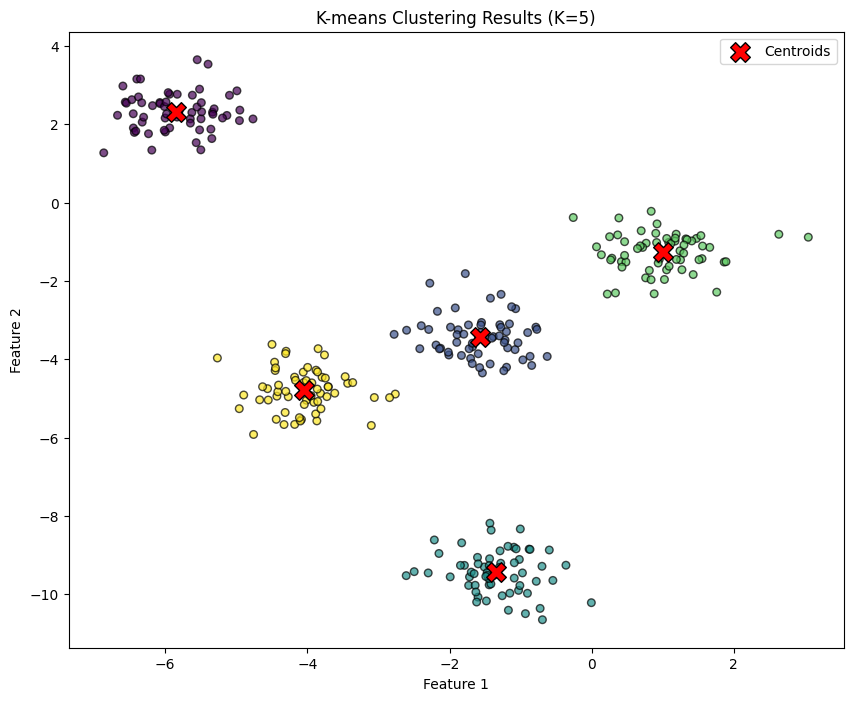

156.5950992886684


In [232]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


def cursor():
    n_Samples = 300
    n_Centers = 5
    #1.資料生成
    X, y_true = make_blobs(n_samples=n_Samples, n_features=2, centers=5, cluster_std=0.5, random_state=2)
    # #視覺化
    # plt.figure(figsize=(8,6))
    # plt.scatter(X[:,0],X[:,1], s=30, alpha=0.7)
    # plt.title("Orignal Data Distribution")
    # plt.xlabel("Feature 1")
    # plt.ylabel("Feature 2")
    # plt.grid(linestyle="--", alpha = 0.5)
    # plt.show()

    from sklearn.cluster import KMeans
    #n_init: 使用不同的質心種子次數 最好的一組作為演算法初始解
    KMeans = KMeans(n_clusters = n_Centers, init="k-means++", n_init=10, max_iter=300, random_state=42) #init="random"
    #訓練模型
    KMeans.fit(X)
    #產生資料點所屬的群集標籤
    labels = KMeans.labels_
    centroids = KMeans.cluster_centers_

    #3.視覺化分群結果
    plt.figure(figsize=(10,8))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", alpha=0.7, edgecolors='k', s=30)
    plt.scatter(centroids[:,0], centroids[:,1], c = 'red', marker='X', edgecolors='k',s=200, label="Centroids")
    plt.title(f"K-means Clustering Results (K={n_Centers})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()
    print(KMeans.inertia_)
cursor()



In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_Samples = 300
n_Centers = 5
#1.資料生成
X, y_true = make_blobs(n_samples=n_Samples, n_features=2, centers=5, cluster_std=0.5, random_state=2)

In [235]:
dists =[]
for i in range(1,21):
    #n_init: 使用不同的質心種子次數 最好的一組作為演算法初始解
    KMeans_elbow = KMeans(n_clusters = i, init="k-means++", n_init=10, max_iter=300, random_state=42) #init="random"
    #訓練模型
    KMeans_elbow.fit(X)
    dists.append(KMeans_elbow.inertia_)
dists

[6378.580952777527,
 3079.031597458526,
 1302.9481419739996,
 396.4047574868556,
 156.5950992886684,
 144.5839695605002,
 132.4813642197972,
 122.5566560709602,
 115.54093552672424,
 100.00758227360781,
 93.07399026560802,
 86.31548692880716,
 79.26654777366177,
 73.26059456832789,
 66.26943508373425,
 63.6914495154331,
 60.06562646670815,
 56.070104858983,
 52.71111810078897,
 51.51392242695112]

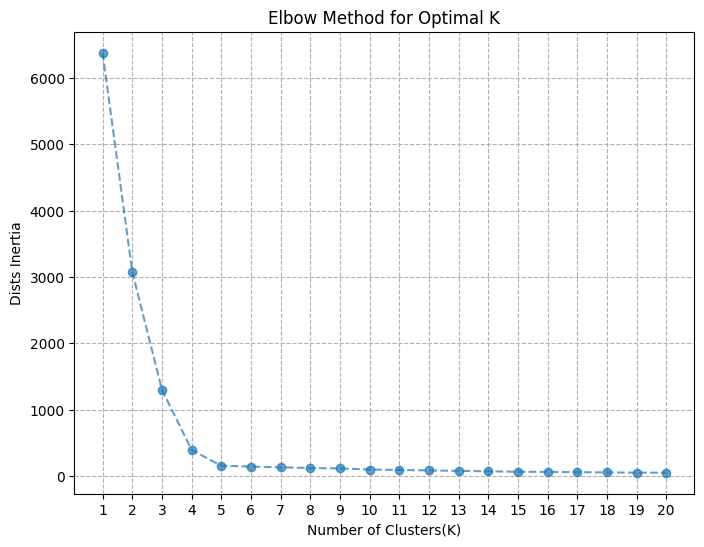

In [243]:
plt.figure(figsize=(8,6))
plt.plot(range(1,21), dists, marker='o', linestyle="--", alpha=0.7)
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters(K)")
plt.ylabel("Dists Inertia")
plt.grid(linestyle="--")
plt.xticks(range(1,21))
plt.show()

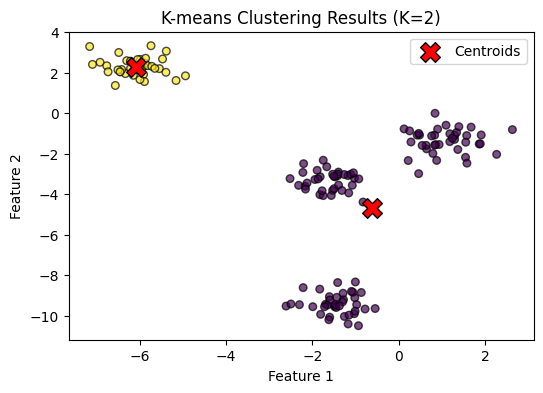

1597.2425892602066


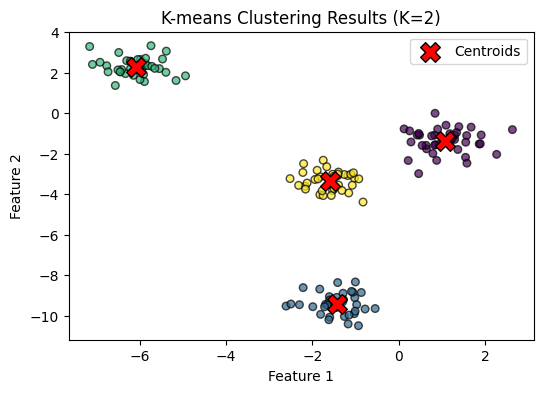

75.68597287041399


In [248]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans



n_Samples = 150
n_Centers = 2
#1.資料生成
X, y_true = make_blobs(n_samples=n_Samples, n_features=2, centers=4, cluster_std=0.5, random_state=2)
# #視覺化
# plt.figure(figsize=(8,6))
# plt.scatter(X[:,0],X[:,1], s=30, alpha=0.7)
# plt.title("Orignal Data Distribution")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.grid(linestyle="--", alpha = 0.5)
# plt.show()

from sklearn.cluster import KMeans
#n_init: 使用不同的質心種子次數 最好的一組作為演算法初始解
KMeans_2 = KMeans(n_clusters = 2, init="k-means++", n_init=10, max_iter=300, random_state=42) #init="random"
KMeans_4 = KMeans(n_clusters = 4, init="k-means++", n_init=10, max_iter=300, random_state=42) #init="random"
#訓練模型
KMeans_2.fit(X)

#產生資料點所屬的群集標籤
labels_2 = KMeans_2.labels_
centroids_2 = KMeans_2.cluster_centers_



#3.視覺化分群結果
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=labels_2, cmap="viridis", alpha=0.7, edgecolors='k', s=30)
plt.scatter(centroids_2[:,0], centroids_2[:,1], c = 'red', marker='X', edgecolors='k',s=200, label="Centroids")
plt.title(f"K-means Clustering Results (K={n_Centers})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
print(KMeans_2.inertia_)


KMeans_4.fit(X)
#產生資料點所屬的群集標籤
labels_4 = KMeans_4.labels_
centroids_4 = KMeans_4.cluster_centers_

#3.視覺化分群結果
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=labels_4, cmap="viridis", alpha=0.7, edgecolors='k', s=30)
plt.scatter(centroids_4[:,0], centroids_4[:,1], c = 'red', marker='X', edgecolors='k',s=200, label="Centroids")
plt.title(f"K-means Clustering Results (K={n_Centers})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
print(KMeans_4.inertia_)

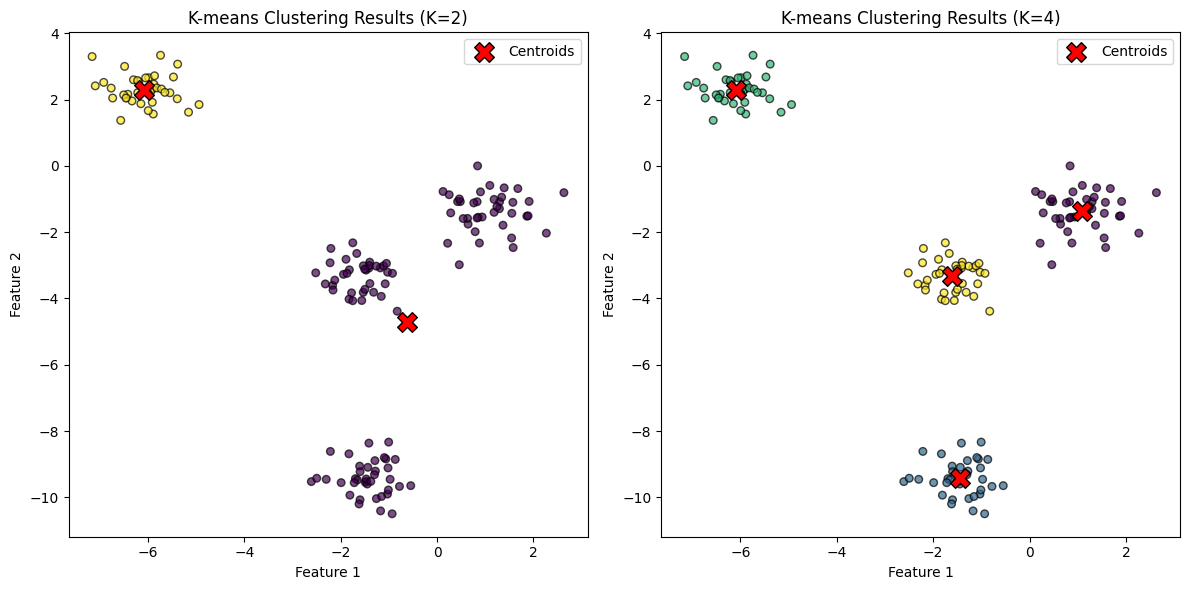

In [254]:
plt.figure(figsize=(12,6))
# 第一張圖
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=labels_2, cmap="viridis", alpha=0.7, edgecolors='k', s=30)
plt.scatter(centroids_2[:,0], centroids_2[:,1], c='red', marker='X', edgecolors='k', s=200, label="Centroids")
plt.title(f"K-means Clustering Results (K=2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# 第二張圖
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=labels_4, cmap="viridis", alpha=0.7, edgecolors='k', s=30)
plt.scatter(centroids_4[:,0], centroids_4[:,1], c='red', marker='X', edgecolors='k', s=200, label="Centroids")
plt.title(f"K-means Clustering Results (K=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()
